In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs
from sklearn import preprocessing

In [9]:
not_dagilimi = scs.multivariate_normal(mean=[0,0], cov=[[1,0.8],[0.8,1]])
notlar = not_dagilimi.rvs(size=40)
notlar = preprocessing.minmax_scale(notlar, feature_range=(0,100))

In [11]:
notlar = pd.DataFrame(notlar, columns=['Almanca','Italyanca'])

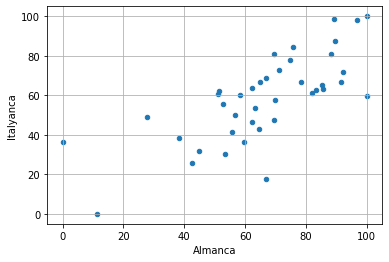

In [71]:
notlar.plot.scatter(x='Almanca', y='Italyanca');
plt.grid(True)

In [26]:
notlar.corr()

,Almanca,Italyanca
Almanca,1.000000,0.728231
Italyanca,0.728231,1.000000


## Tekil deger dekomposizyonu (SVD - singular value decomposition)

In [76]:
not_olcekleyici = preprocessing.StandardScaler()

In [77]:
notlar_olcekli = not_olcekleyici.fit_transform(notlar)

In [92]:
notlar_olcekli.T @ notlar_olcekli / 40

array([[1.        , 0.72823113],
       [0.72823113, 1.        ]])

In [93]:
U, S, V = np.linalg.svd(notlar_olcekli.T @ notlar_olcekli, full_matrices=False)

Lineer olarak bagimsiz bu iki vektor, not uzayinda uzerine yansitma yapacagimiz yeni eksenleri belirtmektedir.

In [96]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [138]:
U[:, 0]

array([-0.70710678, -0.70710678])

In [139]:
U[:, 1]

array([-0.70710678,  0.70710678])

Vektorlerin birim uzunlukta olduguna dikkat ediniz.

In [137]:
np.linalg.norm(U, axis=0)

array([1., 1.])

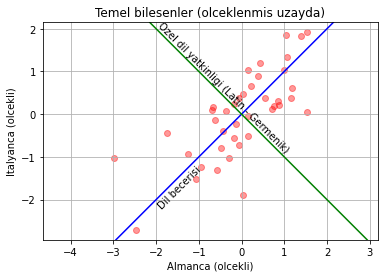

In [126]:
plt.scatter(*preprocessing.scale(notlar).T, color='red', alpha=0.4)
plt.axline((0, 0), (U[0,0], U[1,0]), color='blue')
plt.text(-2, -2.2, "Dil becerisi", rotation=45)
plt.axline((0, 0), (U[0,1], U[1,1]), color='green')
plt.text(-2, 2.2, "Ozel dil yatkinligi (Latin - Germenik)", rotation=-45, verticalalignment='top')
plt.axis('equal')
plt.grid()
plt.xlabel("Almanca (olcekli)")
plt.ylabel("Italyanca (olcekli)")
plt.title("Temel bilesenler (olceklenmis uzayda)");

Istersek orijinal uzayda da temel bilesenleri gosterebiliriz:

Vektorlerin cikis noktasi not ortalamalari olacak:

In [142]:
not_olcekleyici.mean_

array([66.1357274 , 58.54313897])

Vektorlerin bitis noktasini olcekleyicimizden yararlanarak buluyoruz:

In [143]:
Up = not_olcekleyici.inverse_transform(U.T)

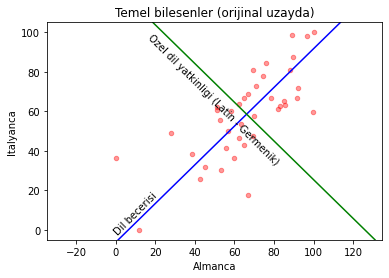

In [144]:
notlar.plot.scatter(x='Almanca', y='Italyanca', color='red', alpha=0.4)
plt.axline(not_olcekleyici.mean_, (Up[0,0], Up[0,1]), color='blue')
plt.text(-2, -2.2, "Dil becerisi", rotation=45)
plt.axline(not_olcekleyici.mean_, (Up[1,0], Up[1,1]), color='green')
plt.text(15, 100, "Ozel dil yatkinligi (Latin - Germenik)", rotation=-45, verticalalignment='top')
plt.axis('equal')
plt.title("Temel bilesenler (orijinal uzayda)");

## Projeksiyon: Orijinal veriyi temel bilesenler uzerine yansitma

In [145]:
temel_bilesen_uzayinda = notlar_olcekli @ U
temel_bilesen_uzayinda.shape

(40, 2)

In [165]:
yetenekler = pd.DataFrame(temel_bilesen_uzayinda, columns=['Dil beceriksizligi','Ozel dil yatkinligi'])
yetenekler.head(5)

,Dil beceriksizligi,Ozel dil yatkinligi
0,-1.261855,-0.392360
1,2.835501,1.397391
2,-2.439879,0.272460
3,0.351201,0.597238
4,-0.079386,-0.145160


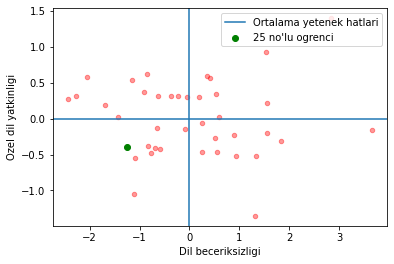

In [167]:
yetenekler.plot.scatter(x='Dil beceriksizligi', y='Ozel dil yatkinligi', color='red', alpha=0.4);
plt.axhline(0, label="Ortalama yetenek hatlari")
plt.axvline(0,)
plt.scatter(*yetenekler.iloc[0].tolist(), color='green', label='25 no\'lu ogrenci')
plt.legend();

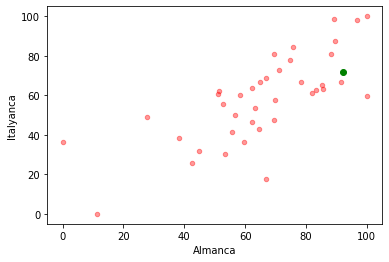

In [169]:
notlar.plot.scatter(x='Almanca', y='Italyanca', color='red', alpha=0.4)
plt.scatter(*notlar.iloc[0].tolist(), color='green', label='25 no\'lu ogrenci');

Sekilde goruldugu uzere, buldugumuz temel bilesen vektorunun dogrultusu dogru ancak yonu yanlis.

In [163]:
U[:, 0]

array([-0.70710678, -0.70710678])

Her iki dersten de kotu not aldikca bu eksendeki deger artiyor.

Eger bunu istemezsek, ortogonaliteyi bozmadan bu vektoru ters cevirebiliriz.

In [164]:
Un = U.copy()
Un[:, 0] *= -1

Ikinci bileseni incelersek:

In [170]:
U[:, 1]

array([-0.70710678,  0.70710678])

Almanca'dan iyi not aldikca bu eksendeki deger azalmaktadir.

In [171]:
yetenekler = pd.DataFrame(notlar_olcekli @ Un, columns=['Dil becerisi','Ozel dil yatkinligi (Germenik - Latin +)'])

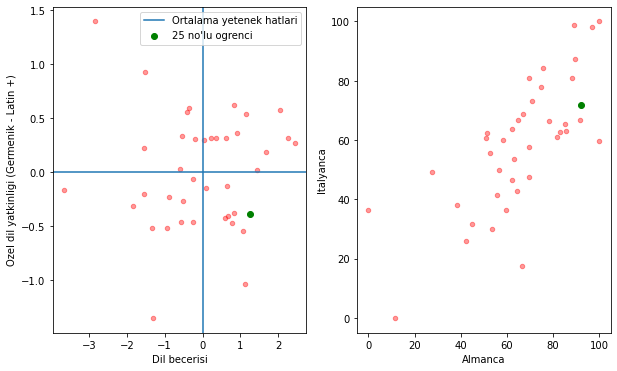

In [177]:
plt.figure(figsize=(10,6))
ax = plt.subplot(1,2,1)
yetenekler.plot.scatter(x='Dil becerisi', y='Ozel dil yatkinligi (Germenik - Latin +)', color='red', alpha=0.4, ax=ax);
plt.axhline(0, label="Ortalama yetenek hatlari")
plt.axvline(0,)
plt.scatter(*yetenekler.iloc[0].tolist(), color='green', label='25 no\'lu ogrenci')
plt.legend()
ax = plt.subplot(1,2,2)
notlar.plot.scatter(x='Almanca', y='Italyanca', color='red', alpha=0.4, ax=ax)
plt.scatter(*notlar.iloc[0].tolist(), color='green', label='25 no\'lu ogrenci');

Yalnizca soldaki figure bakarak ogrencinin dil becerisinin ortalamanin uzerinde ve Germenik dillere daha yatkin oldugu fikrine varabiliyoruz.

## Temel bilesenlerden notlar geri olusturulabilir mi?

Yaptigimiz projeksiyonu geri almak mumkun mu?

In [191]:
geri_olusturulmus_notlar = not_olcekleyici.inverse_transform(yetenekler @ Un.T)

Geri olusturdugumuz notlar ile orijinal notlari beraber plotladigimizda fark olmadigini goruyoruz.

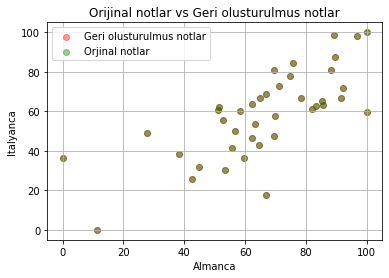

In [219]:
plt.scatter(*geri_olusturulmus_notlar.T, color='red', alpha=0.4, label="Geri olusturulmus notlar")
plt.scatter(*notlar.values.T, color='green', alpha=0.4, label="Orjinal notlar");
plt.xlabel("Almanca")
plt.ylabel("Italyanca")
plt.title("Orijinal notlar vs Geri olusturulmus notlar");
plt.grid()
plt.legend();

## Boyut dusurme?

Peki boyut dusurme bu isin neresinde?

Ogrencilerin basarisinin buyuk bir kisminin `"Dil becerisi"` ile aciklanabildigini gormustuk.

Ogrencilerin iki boyutlu bir uzayda var olan notlarini tek bir sayiyla ozetlemek isteseydiniz dil becerisini kullanabilir miydiniz?

In [195]:
dil_becerisi = notlar_olcekli @ U[:, 0:1]

Yalnizca dil becerisini kullanarak notlari geri olustursak nasil bir tabloyla karsilasiriz?

In [197]:
notlar_ters_projeksiyon = dil_becerisi.dot(U[:, 0:1].T)

''

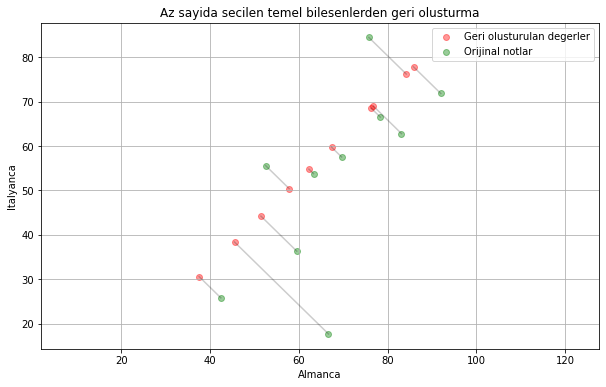

In [213]:
plt.figure(figsize=(10,6))
plt.scatter(*not_olcekleyici.inverse_transform(notlar_ters_projeksiyon)[::4].T, color='red', alpha=0.4, label="Geri olusturulan degerler")
plt.scatter(*notlar.values[::4].T, color='green', alpha=0.4, label="Orijinal notlar");
plt.legend()
plt.title("Az sayida secilen temel bilesenlerden geri olusturma")
plt.xlabel("Almanca")
plt.ylabel("Italyanca")
plt.grid()

for orjinal, projeksiyon in zip(notlar.values[::4], not_olcekleyici.inverse_transform(notlar_ters_projeksiyon)[::4]):
    plt.plot([orjinal[0], projeksiyon[0]], [orjinal[1], projeksiyon[1]], color='black', alpha=0.2)
plt.axis('equal')
;

Bilgi kaybetmis olmamiza ragmen iyi bir geri yansitma yaptigimizi soyleyebiliriz.

> Peki ne kadar bilgi kaybettik?

## Korunan Varyans

Bulunan temel bilesenlerin her biri veriyi ne kadar iyi ozetliyor?

$\sigma = USV^T$ dekompozisyonundaki $S$ matrisini hatirlayalim.

In [178]:
S

array([69.1292454, 10.8707546])

S matrisindeki elemanlar, sirasiyla her bir temel bilesen ekseninde varyansi verir.

$S$ matrisinin normalize edilmis hali de, korunan varyans yuzdeleri olarak dusunulebilir:

In [214]:
S / S.sum()

array([0.86411557, 0.13588443])

Oyleyse  yalnizca `"Dil becerisi"` bilesenini kullanarak bilginin %86'sini koruyoruz: yani bir geri olusturma durumunda kaybettigimiz bilgi %14.

## `scikit-learn` ile PCA

In [220]:
from sklearn import preprocessing, decomposition, pipeline

Yukaridakilerden aklimizda tutmamiz gereken iki husus:

- Orneklem uzayinin merkezini orijine tasidik. (Her degiskenden ortalamalarini cikardik.)
- Degiskenleri olcekledik. (Her degiskeni standart sapmasina bolduk.)
    - Bu islemi yapmazsaniz buyuk olcekte degisen onemsiz degiskenler temel bilesenlerinizi domine edebilir (mesafe bazli diger algoritmalarda oldugu gibi)

In [222]:
notlar.head(5)

,Almanca,Italyanca
0,91.981582,71.832970
1,0.000000,36.562288
2,100.000000,100.000000
3,51.317077,62.303700
4,69.644082,57.537822


In [224]:
not_olcekleyici = preprocessing.StandardScaler()
pca = decomposition.PCA()

In [225]:
X = notlar
X_olcekli = not_olcekleyici.fit_transform(X)

In [226]:
X_pca = pca.fit_transform(X_olcekli)

Yeni temel bilesen uzayini temsil edecek ortonormal vektorler:

In [227]:
pca.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

Korunan varyans:

In [228]:
pca.explained_variance_ratio_

array([0.86411557, 0.13588443])

Geri projeksiyon:

In [234]:
X_ters = pca.inverse_transform(X_pca)

Yukarida elde ettigimiz plotlarin bir benzerini elde etmek icin:

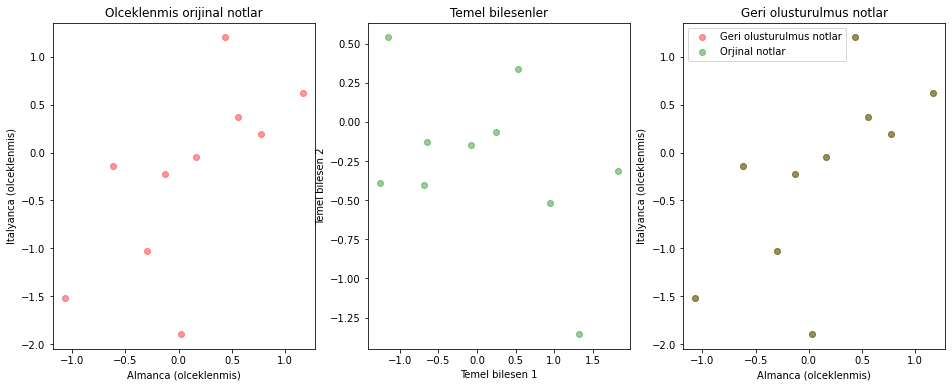

In [238]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.scatter(*X_olcekli[::4].T, color='red', alpha=0.4, label="Notlar")
plt.xlabel("Almanca (olceklenmis)")
plt.ylabel("Italyanca (olceklenmis)")
plt.title("Olceklenmis orijinal notlar")
plt.subplot(1,3,2)
plt.scatter(*X_pca[::4].T, color='green', alpha=0.4, label="Temel bilesenler")
plt.xlabel("Temel bilesen 1")
plt.ylabel("Temel bilesen 2")
plt.title("Temel bilesenler")
plt.subplot(1,3,3)
plt.title("Geri olusturulmus notlar")
plt.scatter(*X_ters[::4].T, color='red', alpha=0.4, label="Geri olusturulmus notlar")
plt.scatter(*X_olcekli[::4].T, color='green', alpha=0.4, label="Orjinal notlar")
plt.xlabel("Almanca (olceklenmis)")
plt.ylabel("Italyanca (olceklenmis)")
plt.legend();


PCA ile boyut sayisini dusurmek istersek (bu kez notlar uzerinde dogrudan calisabilecek bir `pipeline` yapalim):

In [239]:
pca_dusurucu = pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.PCA(n_components=1))
pca_dusurucu.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=1))])

In [242]:
pca_dusurucu._final_estimator.components_

array([[-0.70710678, -0.70710678]])

In [243]:
pca_dusurucu._final_estimator.explained_variance_ratio_

array([0.86411557])

In [245]:
pca_dusurucu.transform(X).shape

(40, 1)

2-boyutlu verimizi 1-boyuta dusurduk.

Ayni islemi dogrudan olceklenmemis `notlar` uzerinde calisabilecek bir `pipeline` ile yapmak istersek:

In [266]:
pca_borusu = pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.PCA(n_components=2))

Notlari hizli bir sekilde geri elde edip toplam fark karesini hesaplarsak:

In [272]:
((pca_borusu.inverse_transform(pca_borusu.fit_transform(X)) - X)**2).sum()

Almanca      1.110716e-27
Italyanca    2.246676e-27
dtype: float64

*"precision" hatasi* disinda veriyi mukemmel bir sekilde geri elde ettik.

### Kernel PCA

Yukarida yaptigimiz tum donusumler **lineer**di.

> Peki notlar icin daha kompleks bir dekompozisyon yapabilir miyiz?
>
> Bilesen analizimizde **non-lineer** donusumlerden yararlanabilir miyiz?

Daha once *SVM* bolumunde cekirdek donusumlerini gormustuk. *PCA* metodunu bu tip bir cekirdek donusumu uzerinde uygularsak daha kompleks bir dekompozisyon elde edebiliriz.

(Hatta orijinal ornek uzayindaki boyut sayisindan daha fazla boyut dahi elde edebiliriz.)

In [340]:
kpca = pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.KernelPCA(n_components=40, kernel='rbf', fit_inverse_transform=True))

In [341]:
kpca.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kernelpca',
                 KernelPCA(fit_inverse_transform=True, kernel='rbf',
                           n_components=40))])

In [342]:
kernel_bilesenler = kpca.transform(X)

In [343]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(kernel_bilesenler[:, 0], kernel_bilesenler[:, 1], kernel_bilesenler[:, 2], alpha=1, label="Kernel bilesenler", c=notlar['Almanca'])
ax.set_xlabel("Temel bilesen 1")
ax.set_ylabel("Temel bilesen 2")
ax.set_zlabel("Temel bilesen 3")
ax.set_title("Temel bilesenler ve Almanca notu")
ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(kernel_bilesenler[:, 0], kernel_bilesenler[:, 1], kernel_bilesenler[:, 2], alpha=1, label="Kernel bilesenler", c=notlar['Italyanca'])
ax.set_xlabel("Temel bilesen 1")
ax.set_ylabel("Temel bilesen 2")
ax.set_zlabel("Temel bilesen 3")
ax.set_title("Temel bilesenler ve Italyanca notu");

Ortaya cikan yeni temel bilesen uzayini yorumlamak eskisi kadar kolay degil.

Korunan varyansin bir benzerini hesaplayabiliyor olsak da, korunan bilginin artik orijinal ornek uzayinda degil kernel uzayinda oldugunu unutmamaliyiz.

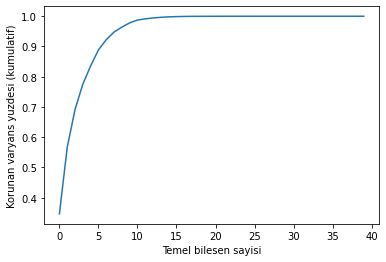

In [354]:
%matplotlib inline
plt.plot((kpca._final_estimator.eigenvalues_ / kpca._final_estimator.eigenvalues_.sum()).cumsum())
plt.xlabel("Temel bilesen sayisi")
plt.ylabel("Korunan varyans yuzdesi (kumulatif)");

## Kernel PCA icin daha iyi bir ornek: halkalar

In [355]:
from sklearn import datasets

### RBF kernel

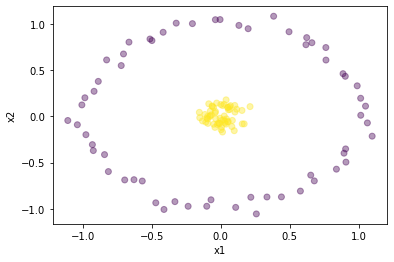

In [399]:
%matplotlib inline
X, y =  datasets.make_circles(n_samples=120, factor=.1, noise=.05, random_state=1)
plt.scatter(*X.T, alpha=0.4, c=y)
plt.xlabel("x1")
plt.ylabel("x2");

Etiketler yalnizca dekompozisyonun mahiyetine dikkat cekmek icin belirtilmistir.

Merkeze yakin vs merkezden uzak noktalarin asagidaki temel bilesen uzaylarinda nasil konumlandiklarina bakalim:

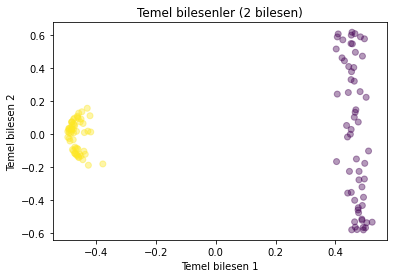

In [402]:
%matplotlib inline
kpca = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    decomposition.KernelPCA(n_components=3, kernel='rbf', fit_inverse_transform=True, gamma=.5)
    )
Xp = kpca.fit_transform(X)
plt.scatter(Xp[:, 0], Xp[:, 1], alpha=0.4, c=y)
plt.xlabel("Temel bilesen 1")
plt.ylabel("Temel bilesen 2")
plt.title("Temel bilesenler (2 bilesen)");


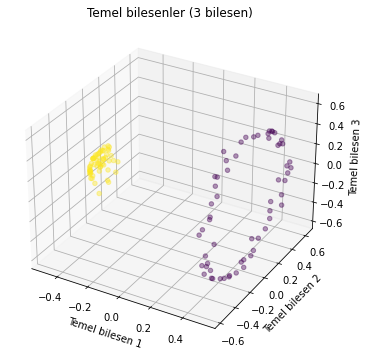

In [403]:
%matplotlib inline
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(*Xp.T, alpha=0.4, c=y)
ax.set_xlabel("Temel bilesen 1")
ax.set_ylabel("Temel bilesen 2")
ax.set_zlabel("Temel bilesen 3")
ax.set_title("Temel bilesenler (3 bilesen)");


In [441]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatLogSlider, IntSlider

In [437]:
@interact
def gammaviz(gamma=FloatLogSlider(min=-10, max=6, value=0.5, step=1, base=2, description="Gamma")):
    kpca = pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        decomposition.KernelPCA(n_components=3, kernel='rbf', fit_inverse_transform=False, gamma=gamma, random_state=1)
        )
    Xp = kpca.fit_transform(X)
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(*Xp.T, alpha=0.4, c=y)
    ax.set_xlabel("Temel bilesen 1")
    ax.set_ylabel("Temel bilesen 2")
    ax.set_zlabel("Temel bilesen 3")
    ax.set_title("Temel bilesenler (3 bilesen)");

interactive(children=(FloatLogSlider(value=0.5, base=2.0, description='Gamma', max=6.0, min=-10.0, step=1.0), …

### Polinomiyel kernel

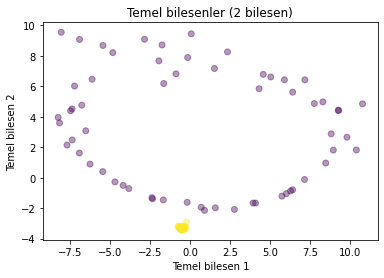

In [429]:
ppca = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    decomposition.KernelPCA(n_components=3, kernel='poly', fit_inverse_transform=True, gamma=3, degree=2, coef0=0)
    )
Xp = ppca.fit_transform(X)
plt.scatter(Xp[:, 0], Xp[:, 1], alpha=0.4, c=y)
plt.xlabel("Temel bilesen 1")
plt.ylabel("Temel bilesen 2")
plt.title("Temel bilesenler (2 bilesen)");


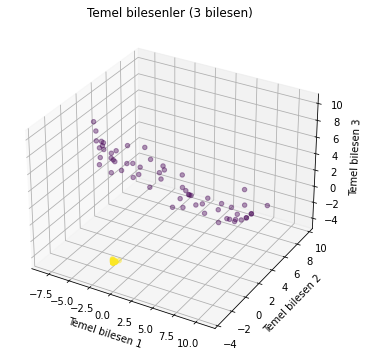

In [430]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(*Xp.T, alpha=0.4, c=y)
ax.set_xlabel("Temel bilesen 1")
ax.set_ylabel("Temel bilesen 2")
ax.set_zlabel("Temel bilesen 3")
ax.set_title("Temel bilesenler (3 bilesen)");

In [457]:
@interact
def degreeviz(
    degree=IntSlider(min=1, max=3, value=2, step=1, description="Degree"),
    coef0=FloatLogSlider(min=-10, max=6, value=0, step=1, base=2, description="Coef0")
    ):
    ppca = pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        decomposition.KernelPCA(n_components=3, kernel='poly', fit_inverse_transform=True, gamma=3, degree=degree, coef0=coef0)
        )
    fig = plt.figure(figsize=(16,6))
    try:
        Xp = ppca.fit_transform(X)
    except np.linalg.LinAlgError as e:
        plt.scatter(X[:, 0], X[:, 1], alpha=0.4, color='gray')
        plt.text(-1, 0.5, f"W A S T E D", fontsize=120, color="red")
        plt.title(f"{e}")
        return
    ax = fig.add_subplot(projection='3d')
    ax.scatter(*Xp.T, alpha=0.4, c=y)
    ax.set_xlabel("Temel bilesen 1")
    ax.set_ylabel("Temel bilesen 2")
    ax.set_zlabel("Temel bilesen 3")
    ax.set_title("Temel bilesenler (3 bilesen)");

interactive(children=(IntSlider(value=2, description='Degree', max=3, min=1), FloatLogSlider(value=0.000976562…